<center> <h1> <u> <font color='red'> Hands on Training on Bangla Language Processing Collocated with CLBLP'23 </font> </u> </h1> </center>

In [3]:
%%time
import os
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import nltk
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

CPU times: user 1.35 ms, sys: 0 ns, total: 1.35 ms
Wall time: 1.36 ms


## Fetching the Dataset


In [ ]:
!wget -O news.csv https://www.dropbox.com/s/12yza2h4bja9fqy/News_12Class.csv?dl=0

In [ ]:
%%time
class_names = ['Accident', 'Art', 'Crime', 'Economics', 'Education', 'Entertainment',
               'Environment', 'International', 'Politics', 'Science_tech', 'Sports', 'Suspicious']
               
dataset = pd.read_csv("news.csv")
dataset

In [ ]:
dataset.columns

In [ ]:
labels = np.array(dataset['Category'])
print('Total size of the dataset : ',len(dataset))

Total size of the dataset :  95866


## Data Preprocessing
Here we will process the data by removing punctuation and stop words from the dataset. It is really a important part for the successful implementation of our word embedding model.

In [ ]:
%%time
total_words = set() ## list of all words in our dataset

def creating_total_words(words):
     for w in words:
          total_words.add(w)

processed_data = [] ##List of all the processed text

for i in range(len(dataset)):
    text = re.sub('[^\u0980-\u09FF]',' ', dataset['Text'][i]) ## removing punctions 
    ## removing stop words from the texts
    words =text.split()
    creating_total_words(words)
    processed_data.append(words)

CPU times: user 24.4 s, sys: 2.3 s, total: 26.7 s
Wall time: 30.8 s


In [ ]:
# Finding the size of the vocabulary
print("Total Number of Words: ",len(total_words))

for i in range(10):
    print(dataset['Text'][i],'\n',processed_data[i],'\n\n')

# Creating Word Embedding Model


In [ ]:
%%time
from gensim.models import Word2Vec

#different hyperparameter that can be used to test the system 
word2vec = Word2Vec(processed_data, size=100,  min_count=5, window=5, workers=40, cbow_mean=0,seed=1, sample=1e-4, hs=1, negative=5, iter=1)

CPU times: user 3min 14s, sys: 1.05 s, total: 3min 15s
Wall time: 2min 2s


In [ ]:
vocabulary = word2vec.wv.vocab
print(len(vocabulary))

123771


In [ ]:
vocabulary

In [ ]:
# Save model in txt format
word2vec.wv.save_word2vec_format('test_w2v.txt', binary=False)

# Fetching Book Review Dataset


In [ ]:
!wget -O book-reviews.xlsx https://github.com/eftekhar-hossain/Bengali-Book-Reviews/raw/master/Dataset%20and%20Notebook/BookReviews.xlsx

--2023-02-20 05:49:39--  https://github.com/eftekhar-hossain/Bengali-Book-Reviews/raw/master/Dataset%20and%20Notebook/BookReviews.xlsx
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/eftekhar-hossain/Bengali-Book-Reviews/master/Dataset%20and%20Notebook/BookReviews.xlsx [following]
--2023-02-20 05:49:39--  https://raw.githubusercontent.com/eftekhar-hossain/Bengali-Book-Reviews/master/Dataset%20and%20Notebook/BookReviews.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 206860 (202K) [application/octet-stream]
Saving to: ‘book-reviews.xlsx’

book-reviews.xlsx   100%[===================>] 202.

In [ ]:
%%time
               
dataset = pd.read_excel("book-reviews.xlsx")

CPU times: user 120 ms, sys: 4.68 ms, total: 125 ms
Wall time: 125 ms


In [ ]:
dataset

In [ ]:
dataset.columns

Index(['Unnamed: 0', 'Review', 'Sentiment', 'cleaned'], dtype='object')

In [ ]:
labels = np.array(dataset['Sentiment'])
print('Total size of the dataset : ',len(dataset))

Total size of the dataset :  1444


In [ ]:
# cleaning function
def cleaning(row):
  text = re.sub('[^\u0980-\u09FF]',' ', row) ## removing punctions
  return text 

dataset['cleaned'] = dataset.Review.apply(cleaning)  

In [ ]:
## Printing the raw dataset
for i in list(np.random.randint(1,len(dataset),10)):
  print("Actual--> ", dataset['Review'][i],"\n", "Cleaned-->",dataset['cleaned'][i],"\n",dataset['Sentiment'][i])

Actual-->  কিছু বলার নাই, পড়ে হতাশ হয়েছি! পড়ার সময় মনে হয়েছে, লেখক শুধুমাত্র লেখাটি শেষ করার জন্যই ব্যস্ত ছিলেন। কাহিনীর গভীরতা ছিল না মোটেও। অথচ একটুখানি গুরুত্ব দিলেই, চরিত্রগুলো বিকশিত হতে পারতো। 
 Cleaned--> কিছু বলার নাই  পড়ে হতাশ হয়েছি  পড়ার সময় মনে হয়েছে  লেখক শুধুমাত্র লেখাটি শেষ করার জন্যই ব্যস্ত ছিলেন  কাহিনীর গভীরতা ছিল না মোটেও  অথচ একটুখানি গুরুত্ব দিলেই  চরিত্রগুলো বিকশিত হতে পারতো  
 0
Actual-->  ভালো হয় নি। 
 Cleaned--> ভালো হয় নি  
 0
Actual-->  চমৎকার একটা বই। কয়েকটা দিন ঘোরের মধ্যে ছিলাম। বই পড়ছি আর মনে হচ্ছে চোখের সামনে সব মারামারি থ্রিল এইসব হচ্ছে। অনুবাদ দারুন হয়েছে। এক কথায় অসাধারন। 
 Cleaned--> চমৎকার একটা বই  কয়েকটা দিন ঘোরের মধ্যে ছিলাম  বই পড়ছি আর মনে হচ্ছে চোখের সামনে সব মারামারি থ্রিল এইসব হচ্ছে  অনুবাদ দারুন হয়েছে  এক কথায় অসাধারন  
 1
Actual-->  অনেক ভুল আছে বইটিতে। 
 Cleaned--> অনেক ভুল আছে বইটিতে  
 0
Actual-->  প্রোজেক্ট হাজার-আল-ফালাসিফাহ লেখাতে শব্দচয়ন ভাল লেগেছে। কাহিনীটা আমার কাছে চমকপ্রদ ছিল। ঘটনার ধারাবাহিকতায় মুন্সিয়ানা রয়েছে। এই ধরণের লেখা আগে 

# Data Preprocessing


###Tokenization

In [ ]:
dataset

In [ ]:
%%time
max_words = 100000

from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words = max_words, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n-', 
                      split=' ', char_level=False, oov_token=None, document_count=0)

tokenizer.fit_on_texts(dataset['cleaned'])

CPU times: user 129 ms, sys: 4.94 ms, total: 134 ms
Wall time: 193 ms


### Attributes of Tokenizer
1. word_counts: A dictionary of words and their counts.

2. word_docs: A dictionary of words and how many documents each appeared in.

3. word_index: A dictionary of words and their uniquely assigned integers.

4. document_count:An integer count of the total number of documents that were used to fit the Tokenizer.

By using these attributes we can find the most frequent words and less frequent words and words that might be useful for our system

In [ ]:
%%time
word_counts = tokenizer.word_counts
word_docs = tokenizer.word_docs
word_index = tokenizer.word_index
document_count = tokenizer.document_count

print(len(word_counts))

7585
CPU times: user 91 µs, sys: 12 µs, total: 103 µs
Wall time: 108 µs


In [ ]:
# Printing the values to understand their functions
def print_func(i, j):
    print(i, j)

print("Words ===> Counts")
k = 0
for (i, j) in word_counts.items():
        print_func(i, j)
        k+=1
        if k== 10:
          k=0
          break

print("\nWords ===> Documents")       
for (i, j) in word_docs.items():
        print_func(i, j)
        k+=1
        if k== 10:
          k=0
          break

print("\nWords ===> Index")
for (i, j) in word_index.items():
        print_func(i, j)
        k+=1
        if k== 10:
          k=0
          break

print("Total Number of Documents: ", document_count)

Words ===> Counts
বই 1078
টি 34
আমার 294
সংগ্রহে 11
আছে 110
এবং 158
তা 84
আমি 200
পড়েছি 28
সম্পর্কে 43

Words ===> Documents
স্বল্প 1
একটি 288
অপশন 1
কিভাবে 32
ফরেন 1
বর্ন 1
১৫৭ 1
বলবো 10
এড্রেস 1
কাজে 24

Words ===> Index
বই 1
এই 2
বইটি 3
না 4
ভালো 5
একটি 6
অনেক 7
জন্য 8
একটা 9
আমার 10
Total Number of Documents:  1444


### Frequency Distribution of Data Length
Here frequency of each length will be counted to find out which lenth size is more appropiate at the time of using pad sequences. we all plot this frequency in histogram to get a visual understanding.

In [ ]:
Length_frequency = {}

for i in range(len(dataset)):
     index = len(dataset['cleaned'][i])
     Length_frequency[index] = Length_frequency.get(index, 0)+1


Text(0.5, 1.0, 'Length-Frequency Distribution')

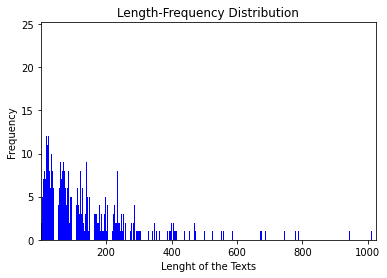

In [ ]:
import seaborn as sns

plt.bar(list(Length_frequency.keys()), Length_frequency.values(), color ='b')
plt.xlim(1, 1024)

plt.xlabel('Lenght of the Texts')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')

### Encoding Data into Numbers
To encode our text into numbers we will use  text_to_word_sequence function from keras.

In [ ]:
%%time
# Convert string into list of integer indices
sequences = tokenizer.texts_to_sequences(dataset['cleaned'])

CPU times: user 90.4 ms, sys: 0 ns, total: 90.4 ms
Wall time: 93.9 ms


In [ ]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
print(dataset['cleaned'][1])
print(sequences[1])

Found 7585 unique tokens.
ফালতু বই  শুধু শুধু টাকা নষ্ট 
[111, 1, 121, 121, 153, 173]


### Pad Sequence
To make all the texts fo the same length we will use pad sequence from keras to standardize their length.

Corpus contain our final processed data and labels contains the labels of associated data.

In [ ]:
%%time
## Before padding length of different training examples 
mx = len(sequences[0])
for x in sequences:
  mx =max(mx, len(x))
print("Maximum Review length",mx)

##We can also determine maxlen by plotting the frequency distribution of the lengths
corpus = keras.preprocessing.sequence.pad_sequences(sequences, value=0.0, padding='post', maxlen= 100)
## We get the maxlen value from the Length frequency distribution

print(corpus[1])


Maximum Review length 568
[111   1 121 121 153 173   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]
CPU times: user 11.3 ms, sys: 1.08 ms, total: 12.4 ms
Wall time: 17.1 ms


In [ ]:
print("Shape of the courpus: ", corpus.shape)

for i in range(2):
    print(dataset['cleaned'][i],"\n",corpus[i])

Shape of the courpus:  (1444, 100)
বই টি আমার সংগ্রহে আছে এবং তা আমি পড়েছি  বই টি সম্পর্কে যদি এক কথায় বলতে হয় তবে বলবো মন্দের ভালো   খুবই সাধারন মানের আলোচনা করা হয়েছে ফরেক্স নিয়ে তবে অপ্রয়োজনীয় গল্প লিখে আর নিজের প্রকাশিত বইয়ের বিজ্ঞাপন দিযে বইয়ের পেজের সংখ্যা বাড়ানো হয়েছে শুধু   কয়েকটি উদাহরন দিলে বুঝতে পারবে   ফরেন রেমিটেন্স কি কিভাবে দেশের কাজে লাগে কিভাবে ইমেল এড্রেস খুলতে হয় এসব আলাপ করা হয়েছে  কিন্তু লেখক তার বই তে ডিফল্ট করা কোন ইন্ডিকেটর ই এ ট্রেডিং প্ল্যান  মানি মেনেজমেন্টে ইত্যাদি নিয়ে এক বর্ন আলোচনা করেন নাই  এমন কি ট্রেডিং প্লাটফর্মের বিভিন্ন অপশন নিয়ে দায়সারা বর্নণা দিয়েছেন  সাথে রয়েছে অসংখ্য বানান ভুল  বইয়ের ৪৭৯ টি পেজের মধ্য ৩২২ থেকে ৪৭৯ নাম্বার পেজ পর্যন্ত ১৫৭ টি পেজে যা রয়েছে তা  অতিকথন  বা  পুনরায় প্রচার  ছাড়া কিছুই না  একটি টিউটোরিয়াল সিডি দেয়া হয়েছে  তা অতি স্বল্প আলোচনা করা হয়েছে  
 [3076   30 1426  778 1427   20  121  694  695  902  193  396 3077 3078
   60  130  696  214  107  130 3079 3080 3081   32  460 1918   39   20
   38   33   36    1  505 3082   39   42 

## Creating Train, Test and Validation set


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(corpus,dataset['Sentiment'],test_size = 0.1, random_state = 0)

print("Training Size: ",X_train.shape)
print("Test Size: ",X_test.shape)

Training Size:  (1299, 100)
Test Size:  (145, 100)


# Word Embedding
Now we will implement the model with two types of word embedding. At first we will implement the model with pretrained word embedding model of the facebook. We will check how it performs,

After that we will use our own word embedding. Word embedding can be done in different ways. 

1. We can use embedding layer form keras.
2. Also use gensim model to implement word embedding.
3. Fasttext model of facebook for word embedding.



## With pretrained word embedding (News Corpus) Word2Vec


In [ ]:
%%time
# load the embedding vectors
from gensim.models import KeyedVectors

word_embedding_model = KeyedVectors.load_word2vec_format('test_w2v.txt', binary=False,encoding='utf-8')

CPU times: user 8.84 s, sys: 396 ms, total: 9.24 s
Wall time: 8.84 s


In [ ]:
vocabulary = word_embedding_model.wv.vocab

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


### Extracting word vector
Now we will extract the word vector. These word vectors will be assainged to the words of our model. 


- `vocabulary`: A list of words exist in the loaded model
- `word_to_vec_map`: dictionary mapping words to their GloVe vector representation.

In [ ]:
%%time

vocabulary = word_embedding_model.wv.vocab
word_to_vec_map = {}

x = "বই"
for w in vocabulary:
  word_to_vec_map[w] = word_embedding_model[w]
  x = w
print(x, word_to_vec_map[x].shape, word_to_vec_map[x]) # From this shape we will get our embedding dimension
print('Size of vocabulary:', len(vocabulary))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


ভায়োকানোর (100,) [ 1.22731063e-03 -4.68483008e-03  2.81789131e-03  1.98112358e-03
  9.30385359e-05  4.86824010e-03  3.54606914e-03  2.31177243e-03
  1.25509873e-03 -3.57806683e-03  1.76821277e-03  2.85542780e-03
 -4.96152614e-04  2.54538865e-03  1.70123647e-03  1.65193528e-03
  3.42973415e-03 -4.62465547e-03  3.97545379e-03  1.89540640e-03
  4.30080853e-03 -1.59172318e-03  5.11272345e-03 -2.45127454e-03
 -4.29824274e-03  3.77513794e-03  1.35844131e-03  2.58333539e-03
 -4.14586905e-03 -3.26250936e-03 -8.26060190e-04  4.22250526e-03
 -4.23689047e-03  1.11918875e-04  1.21472240e-03  3.93214636e-03
  4.57058428e-03 -1.50520063e-03 -2.88890791e-03  2.08879495e-03
  1.19374046e-04  1.83130708e-03  3.77672445e-03  5.48498472e-04
  2.74955202e-03  9.03666660e-04  1.69434026e-03  1.12741010e-03
 -4.31204541e-03  1.56714837e-03  3.97183653e-03 -2.93253036e-03
  4.00143722e-03 -3.74181010e-03  5.21955772e-05 -3.58825177e-03
  3.84997693e-03  3.78407165e-03  3.20093473e-03 -4.23274469e-03
  1.8182

### Finding most frequent words
Now we will find some of the most frequent words of the model and similar words to them. That might be useful in future. Just use of some function

In [ ]:
%%time
frequent_words = word_embedding_model.wv.index2entity[50:60]
for w in frequent_words:
  print('\n',w)
  similar_words = word_embedding_model.wv.most_similar(w, topn=3)
  for wr, vec in similar_words:
     print(wr, vec)


 হচ্ছে
হয়েছে 0.9066635370254517
হলো 0.8781073689460754
হবে 0.8742368221282959

 শুরু
শেষ 0.844743013381958
শুরুর 0.7467901110649109
চলবে 0.7351382970809937

 দলের
দলটির 0.8578292727470398
দল 0.8483738303184509
দলীয় 0.7817916870117188

 হয়ে
হয়ে 0.852553129196167
হয়েই 0.7721112966537476
আবার 0.7497832775115967

 প্রধানমন্ত্রী
শেখ 0.8018879890441895
হাসিনা 0.7959433794021606
তিনি 0.7893133163452148

 করেছে
করেছিল 0.9372617602348328
করবে 0.9055606126785278
করছে 0.905285120010376

 আমি
আমরা 0.9370844960212708
আমরাও 0.8908119201660156
আমিও 0.8714027404785156

 দিয়ে
দিয়েই 0.8934624195098877
দিয়ে 0.8590362071990967
দিলে 0.8094097375869751

 দেশের
বিশ্বের 0.8169006109237671
দুনিয়ার 0.8010940551757812
বাংলাদেশের 0.7996889352798462

 বিডিনিউজ
টোয়েন্টিফোর 0.835196852684021
পিসি 0.8269666433334351
ডটকম 0.8192483186721802
CPU times: user 209 ms, sys: 83.2 ms, total: 292 ms
Wall time: 182 ms


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  after removing the cwd from sys.path.


### Creating Embeding Matrix
Now, we will build an embedding matrix that we can load into an Embedding layer. It must be a matrix of shape `(max_words, embedding_dim)`, where each entry i contains
the embedding_dim - dimensional vector for the word of index iin the reference word index. 

In [ ]:
max_words = 100000 # Most frequent 100000 words (It should be initialize during tokenization process)
embedding_dim = 100 # embedding dimension of the model

embedding_matrix = np.zeros((max_words, embedding_dim), dtype = float)

c = 0
for word, i in word_index.items():
    if i < max_words:
      embedding_vector = word_to_vec_map.get(word)
      if embedding_vector is None:
          c +=1;
          print(word)
      if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
# Words not found in the pretrained model is assigned as zeros
print("Number of words not in the vocabulary: ", c)
print("Percentage of words not in the vocabulary: ", (c/max_words)*100)

### Defining the Model


In [ ]:
# Keras Functional API

import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Dense, Activation, Dropout,Embedding,GlobalAveragePooling1D
from keras.models import Model
from tensorflow.keras.optimizers import Adam,SGD,Nadam,RMSprop
from tensorflow.keras.models import load_model

In [ ]:
keras.backend.clear_session()

input_length = 100


input = Input(shape=(input_length,))
embedding = Embedding(max_words, embedding_dim, input_length = 100, weights=[embedding_matrix], trainable=False)(input)
flatten = GlobalAveragePooling1D()(embedding)
dense1 = Dense(64, activation = 'relu')(flatten)
dense2 = Dense(32, activation = 'relu')(dense1)
output = Dense(1, activation = 'sigmoid')(dense2)

model_pretrained = Model(inputs=input, outputs=output)

model_pretrained.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding (Embedding)       (None, 100, 100)          10000000  
                                                                 
 global_average_pooling1d (G  (None, 100)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 64)                6464      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                             

In [ ]:
model_pretrained.compile(optimizer = 'adam',
                      loss = 'binary_crossentropy',
                      metrics =['accuracy'])

In [ ]:
%%time
history = model_pretrained.fit(X_train,
                              y_train,
                              epochs = 100,
                              batch_size = 16,
                              verbose = 1,
                              validation_split =0.1)

Epoch 1/100
74/74 [==============================] - 3s 13ms/step - loss: 0.6527 - accuracy: 0.6749 - val_loss: 0.6242 - val_accuracy: 0.6846
Epoch 2/100
74/74 [==============================] - 0s 5ms/step - loss: 0.6168 - accuracy: 0.6775 - val_loss: 0.6206 - val_accuracy: 0.6615
Epoch 3/100
74/74 [==============================] - 0s 4ms/step - loss: 0.6004 - accuracy: 0.6835 - val_loss: 0.6094 - val_accuracy: 0.6692
Epoch 4/100
74/74 [==============================] - 0s 3ms/step - loss: 0.5901 - accuracy: 0.6861 - val_loss: 0.6018 - val_accuracy: 0.6692
Epoch 5/100
74/74 [==============================] - 0s 2ms/step - loss: 0.5716 - accuracy: 0.6997 - val_loss: 0.5857 - val_accuracy: 0.6769
Epoch 6/100
74/74 [==============================] - 0s 3ms/step - loss: 0.5544 - accuracy: 0.7049 - val_loss: 0.5738 - val_accuracy: 0.6846
Epoch 7/100
74/74 [==============================] - 0s 3ms/step - loss: 0.5359 - accuracy: 0.7160 - val_loss: 0.5460 - val_accuracy: 0.6923
Epoch 8/100


#### Plotting accuracy and loss graphs

Finaly loss and accuracy graph is plotted to take some important decision such as after how many epochs our model starts to overfit, what batch size give us better result, whether we need to get more data or not.

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

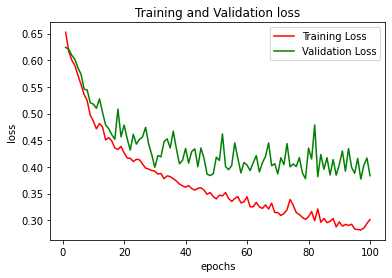

In [ ]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, loss, 'r-', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label = 'Validation Loss')
plt.title('Training and Validation loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

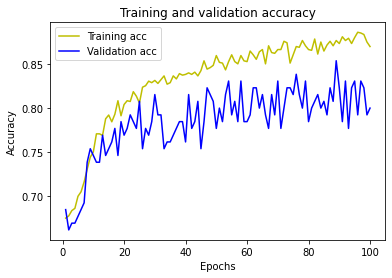

In [ ]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


In [ ]:
ls, ac = model_pretrained.evaluate(X_test, y_test)

print("Final loss ==========>", ls)
print('Final System Accuracy ========>', ac)


5/5 [==============================] - 0s 4ms/step - loss: 0.5968 - accuracy: 0.7517
Final loss ==========> 0.5968199372291565
Final System Accuracy ========> 0.751724123954773


## Without pre-trained word embedding
Here we will not use any pre trained word embedding rather than we will use embedding layer from keras. We may see some change in the accuracy of the models. 

In [ ]:
keras.backend.clear_session()


model_without_pretrained = keras.models.Sequential([
    keras.layers.Embedding(max_words, embedding_dim, input_length = 100),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Dense(64, activation = tf.nn.relu),
    keras.layers.Dense(32, activation = tf.nn.relu),
    keras.layers.Dense(1, activation = 'sigmoid')
])

model_without_pretrained.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          10000000  
                                                                 
 global_average_pooling1d (G  (None, 100)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 64)                6464      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 10,008,577
Trainable params: 10,008,577
Non-trainable params: 0
____________________________________________

In [ ]:
model_without_pretrained.compile(optimizer = 'adam',
                      loss = 'binary_crossentropy',
                      metrics =['accuracy'])

In [ ]:
%%time
history = model_without_pretrained.fit(X_train,
                              y_train,
                              epochs = 10,
                              batch_size = 16,
                              verbose = 1,
                              validation_split =0.1)

Epoch 1/10
74/74 [==============================] - 8s 104ms/step - loss: 0.6296 - accuracy: 0.6724 - val_loss: 0.6200 - val_accuracy: 0.6846
Epoch 2/10
74/74 [==============================] - 7s 100ms/step - loss: 0.5877 - accuracy: 0.6912 - val_loss: 0.5799 - val_accuracy: 0.7077
Epoch 3/10
74/74 [==============================] - 7s 100ms/step - loss: 0.4192 - accuracy: 0.8186 - val_loss: 0.3213 - val_accuracy: 0.8615
Epoch 4/10
74/74 [==============================] - 7s 100ms/step - loss: 0.1946 - accuracy: 0.9367 - val_loss: 0.1833 - val_accuracy: 0.9538
Epoch 5/10
74/74 [==============================] - 7s 100ms/step - loss: 0.1069 - accuracy: 0.9666 - val_loss: 0.1493 - val_accuracy: 0.9385
Epoch 6/10
74/74 [==============================] - 7s 100ms/step - loss: 0.0657 - accuracy: 0.9812 - val_loss: 0.1110 - val_accuracy: 0.9615
Epoch 7/10
74/74 [==============================] - 7s 99ms/step - loss: 0.0413 - accuracy: 0.9940 - val_loss: 0.1326 - val_accuracy: 0.9385
Epoch 8

#### Plotting accuracy and loss graphs

Finaly loss and accuracy graph is plotted to take some important decision such as after how many epochs our model starts to overfit, what batch size give us better result, whether we need to get more data or not.

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

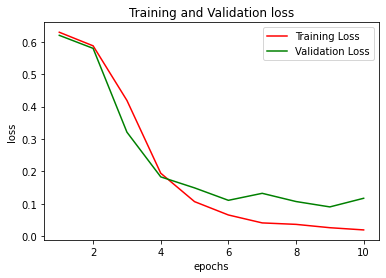

In [ ]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, loss, 'r-', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label = 'Validation Loss')
plt.title('Training and Validation loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

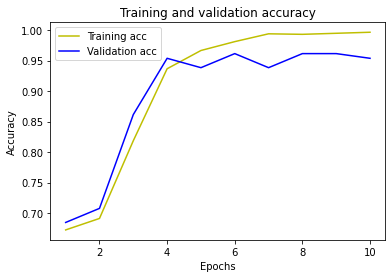

In [ ]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


In [ ]:
ls, ac = model_without_pretrained.evaluate(X_test, y_test)

print("Final loss ==========>", ls)
print('Final System Accuracy ========>', ac)


5/5 [==============================] - 0s 4ms/step - loss: 0.4012 - accuracy: 0.8621
Final loss ==========> 0.4011794328689575
Final System Accuracy ========> 0.8620689511299133


# Pretrained Glove

In [ ]:
!wget -O bn_glove.39M.300d.txt https://www.dropbox.com/s/6pv4bcofia2yr0d/bn_glove.39M.300d.txt?dl=0

--2023-02-20 05:51:55--  https://www.dropbox.com/s/6pv4bcofia2yr0d/bn_glove.39M.300d.txt?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.85.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.85.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/6pv4bcofia2yr0d/bn_glove.39M.300d.txt [following]
--2023-02-20 05:51:56--  https://www.dropbox.com/s/raw/6pv4bcofia2yr0d/bn_glove.39M.300d.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc2b16dcff18793e1a44a43d1472.dl.dropboxusercontent.com/cd/0/inline/B2217KOVPZiXgDp-Nbg9MEud9N-n8Dtt683OQ4P4lz0heMx2YTgedWHhU4OVPDga5eqbCxQJ5-TnV0Owr_NBIGLyleAS-IMSoXfafymLnUzRhn51QAaHCxWZTQSY-1uyKAeJU0DfNLrUtM11gE9_akeaBm7iCkHzaP3gY4F8nEUeJw/file# [following]
--2023-02-20 05:51:56--  https://uc2b16dcff18793e1a44a43d1472.dl.dropboxusercontent.com/cd/0/inline/B2217KOVPZiXgDp-Nbg9MEud9N-n8Dtt683OQ4P4lz0he

In [ ]:
# coding: utf-8
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec


# Convert
input_file = 'bn_glove.39M.300d.txt'
output_file = 'glove-bangla.txt'
glove2word2vec(input_file, output_file)

(178153, 300)

## With pretrained word embedding (News Corpus)


In [ ]:
%%time
# load the embedding vectors
from gensim.models import KeyedVectors

word_embedding_model = KeyedVectors.load_word2vec_format(output_file , binary=False,encoding='utf-8')

CPU times: user 34.8 s, sys: 1.16 s, total: 36 s
Wall time: 37.4 s


In [ ]:
vocabulary = word_embedding_model.wv.vocab

<ipython-input-17-37420655a82b>:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  vocabulary = word_embedding_model.wv.vocab


### Extracting word vector
Now we will extract the word vector. These word vectors will be assainged to the words of our model. 


- `vocabulary`: A list of words exist in the loaded model
- `word_to_vec_map`: dictionary mapping words to their GloVe vector representation.

In [ ]:
%%time

vocabulary = word_embedding_model.wv.vocab
word_to_vec_map = {}

x = "বাংলাদেশ"
for w in vocabulary:
  word_to_vec_map[w] = word_embedding_model[w]
  x = w
print(x, word_to_vec_map[x].shape, word_to_vec_map[x]) # From this shape we will get our embedding dimension
print('Size of vocabulary:', len(vocabulary))

<timed exec>:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).


<unk> (300,) [-7.55600e-03  1.23840e-02 -1.42450e-02  9.87380e-02 -3.80100e-02
 -1.86860e-02  5.77180e-02 -3.94050e-02  4.00180e-02  3.31970e-02
  1.30062e-01  1.20189e-01  5.04580e-02  8.08670e-02  1.63250e-02
 -6.37820e-02 -2.66370e-02 -4.52020e-02 -4.37750e-02  4.26100e-03
 -4.80670e-02  7.35000e-02  8.66480e-02  3.27660e-02 -7.03010e-02
 -4.88510e-02 -1.16011e-01 -6.28630e-02 -8.33400e-02 -3.25560e-02
  1.15500e-03  5.83740e-02  7.18960e-02  7.31960e-02 -4.74580e-02
  3.87700e-03  1.05177e-01  6.24340e-02 -2.62070e-02  6.35460e-02
 -1.31210e-02  2.88700e-03  2.61500e-02  8.67340e-02  8.36790e-02
 -3.42020e-02 -7.53660e-02 -7.47370e-02 -4.76070e-02 -1.60660e-02
 -9.85810e-02  1.09601e-01 -5.50240e-02  3.41470e-02  5.16940e-02
 -6.94070e-02 -7.50500e-03 -2.90730e-02 -1.95310e-02 -3.62300e-03
 -2.02900e-02  1.26250e-02  3.07490e-02 -3.73100e-03 -2.04460e-02
  8.97060e-02  3.28900e-02 -8.59010e-02 -6.95820e-02  3.25150e-02
  8.86570e-02 -3.72760e-02 -6.49580e-02  2.65240e-02  1.98900e-

In [ ]:
cc = ['করিম','বাংলাদেশ']
check_words2 = []
for w in cc:
    if w in vocabulary:
      print(w)
      print(word_to_vec_map[w])
      check_words2.append(w)

করিম
[-1.407600e-01  3.569940e-01  3.422130e-01 -2.254240e-01 -2.328600e-01
 -1.827930e-01 -3.916930e-01 -1.748430e-01  3.045890e-01 -3.773700e-02
 -4.495820e-01  2.938210e-01  2.647400e-02  1.277560e-01  1.983160e-01
 -2.431480e-01  5.446700e-01  7.901370e-01  1.422700e-02  2.395520e-01
  4.711320e-01  1.011959e+00 -7.310210e-01 -5.958110e-01  6.213590e-01
  5.907500e-02  5.184710e-01  4.523640e-01  4.246410e-01  7.424320e-01
 -7.409960e-01 -1.201540e-01 -3.978440e-01 -4.947630e-01  1.309140e-01
 -2.960700e-01 -5.243600e-02 -4.884200e-02  3.227180e-01 -1.391560e-01
  4.467050e-01 -3.444550e-01 -1.697050e-01  1.817200e-01  9.452300e-02
 -5.213900e-01  1.797200e-02  1.514500e-02  3.807580e-01  7.050870e-01
 -4.903060e-01 -1.268790e-01 -1.384430e-01  6.852180e-01 -1.044316e+00
  3.463380e-01 -3.025330e-01 -4.571200e-02 -2.428200e-01  5.184810e-01
 -1.162320e-01  1.813920e-01  1.710700e-02 -6.786000e-03  5.557400e-01
  3.483810e-01  7.947100e-02 -2.407280e-01  3.428600e-01 -3.904800e-01
 

### Finding most frequent words
Now we will find some of the most frequent words of the model and similar words to them. That might be useful in future. Just use of some function

In [ ]:
%%time
frequent_words = word_embedding_model.wv.index2entity[50:60]
for w in frequent_words:
  print('\n',w)
  similar_words = word_embedding_model.wv.most_similar(w, topn=3)
  for wr, vec in similar_words:
     print(wr, vec)

<timed exec>:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
<timed exec>:4: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).



 আছে
রয়েছে 0.5870643854141235
অনেক 0.550443172454834
নেই 0.527860164642334

 একজন
যিনি 0.6538171172142029
ছিলেন 0.571128249168396
ব্যক্তি 0.5518900156021118

 যায়
পাওয়া 0.7962223291397095
গিয়েছিল 0.6485409736633301
পড়ে 0.6365272998809814

 হচ্ছে
করা 0.48764684796333313
যাচ্ছে 0.47582098841667175
এগুলো 0.47380131483078003

 হন
হয়েছিলেন 0.739832878112793
নির্বাচিত 0.6171943545341492
হয়েছেন 0.6106654405593872

 দলের
দল 0.6920536756515503
দলে 0.6245256662368774
দলটির 0.6236886978149414

 বিভিন্ন
নানা 0.6497145891189575
অন্যান্য 0.5586411952972412
বহু 0.5433717966079712

 তা
সেটি 0.5834987163543701
যে 0.5711970329284668
কিন্তু 0.569290280342102

 হয়ে
পড়ে 0.6394785046577454
যায় 0.631236732006073
থাকে 0.582851231098175

 বাংলাদেশ
বাংলাদেশের 0.5982800722122192
মিরপুর১৮ 0.5265884399414062
মিরপুর১৫ 0.525682806968689
CPU times: user 586 ms, sys: 242 ms, total: 828 ms
Wall time: 591 ms


### Creating Embeding Matrix
Now, we will build an embedding matrix that we can load into an Embedding layer. It must be a matrix of shape `(max_words, embedding_dim)`, where each entry i contains
the embedding_dim - dimensional vector for the word of index iin the reference word index. 

In [ ]:
max_words = 100000 # Most frequent 100000 words (It should be initialize during tokenization process)
embedding_dim = 300 # embedding dimension of the model

embedding_matrix = np.zeros((max_words, embedding_dim), dtype = float)

c = 0
for word, i in word_index.items():
    if i < max_words:
      embedding_vector = word_to_vec_map.get(word)
      if embedding_vector is None:
          c +=1;
          print(word)
      if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
# Words not found in the pretrained model is assigned as zeros
print("Number of words not in the vocabulary: ", c)
print("Percentage of words not in the vocabulary: ", (c/max_words)*100)

রকমারির
পুরাই
অবশ্যপাঠ্য
বইটাতে
মায়ান
টিউটোরিয়াল
রকমারিকে
লুতুপুতু
রাবা
বইটাকে
হয়না
ডেনিয়েলি
পাবলিশ
ফাইজলামি
হয়েছিলো
ওভাররেটেড
কিসু
কিসুই
শেমলেস
পড়ছি
শামীর
মাশাআল্লাহ
আলহামদুলিল্লাহ্
ঋভু
রকমারিতে
অামার
ভার্সনটা
যায়গায়
সেরিনা
বইটাতেও
আনসলভড
লাগছিলো
গুডরিডসে
যায়না
জোসির
সাসপেন্সে
ত্যানাপ্যাচানী
বাংলাভাষায়
প্যারাময়
টুম্পার
কিনুন
ডয়েল
সুবিন
সহযোগীতা
ম্যাককার্টার
কাসলারের
পিয়াসের
কনস্পিরেসি
পুজিবাজারের
বাংলিশ
ধরতেছে
ভালবাসলে
বুলশিট
প্রোমোট
ধিক
অনুবাদটা
অর্খানের
কোয়ালিটিও
ডায়লগ
বইটায়
হইসি
কনসেপ্টটা
ফ্ল্যাপে
এক্সপেকটেশন
মেমসাহেবের
এত্তো
পেমের
ফোটাও
মহাশয়
পারতেসি
ফাতরা
দেয়াটা
করসে
পারছিনা
পড়াটাই
অরিজিনালটি
রেকোমেন্ডেড
পাছা
বস্তাপঁচা
তাবিজের
বইয়েত
জঘন্যমানের
ঠেলায়
বিকৃতিতে
কস্টের
বালের
ডায়রী
বুনিপের
আগ্নেয়গিরিও
চান্সমত
এইটাতো
ঢুইকে
লুসলি
কানেক্টেড
স্প্রিঙ্কলিং
ইউরোওয়ারশিপিং
রেসিসম
নেটিভস
কাউনটার
ইম্পেরিয়ালিস্ট
ইউরপিয়ান
জিলাসলি
ফ্ল
স্ত্রাকচার
বিলড
ডিসাপয়েনটিং
শীর্ষেন্দুর
কুসংষ্কার
টুনে
উদাহরনে
ফাকফোঁকর
ওডেস্ক
কেনাই
বিচ্ছিরি
আওরঙ্গজীব
বায়াসড
মনেহয়
বইগুলার
মুজাই
উপন্যাসটা
সাইকিক
পাগল্প্রায়
পারক

#[FastText Embedding](https://fasttext.cc/docs/en/crawl-vectors.html)

In [ ]:
from urllib.request import urlopen
import gzip

# get the vectors
file = gzip.open(urlopen('https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.bn.300.vec.gz'))

In [ ]:
vocab_and_vectors = {}
# put words as dict indexes and vectors as words values
for line in file:
  values = line.split()
  word = values [0].decode('utf-8')
  vector = np.asarray(values[1:], dtype='float32')
  vocab_and_vectors[word] = vector

In [ ]:
max_words = 10000

embedding_matrix = np.zeros((max_words, 300))
c = 0
for word, i in word_index.items():
  if i < max_words:
    embedding_vector = vocab_and_vectors.get(word)
    if embedding_vector is None:
          c +=1;
          print(word)
  # words that cannot be found will be set to 0
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

print("Number of words not in the vocabulary: ", c)
print("Percentage of words not in the vocabulary: ", (c/max_words)*100)        

রকমারিকে
ডেনিয়েলি
ত্যানাপ্যাচানী
প্যারাময়
অর্খানের
অরিজিনালটি
রেকোমেন্ডেড
বইয়েত
জঘন্যমানের
টিকটক
চান্সমত
লুসলি
স্প্রিঙ্কলিং
ইউরোওয়ারশিপিং
রেসিসম
ইম্পেরিয়ালিস্ট
ইউরপিয়ান
জিলাসলি
স্ত্রাকচার
ডিসাপয়েনটিং
ফাকফোঁকর
আওরঙ্গজীব
মুজাই
পাগল্প্রায়
পারকুম
ফিকসান
মোনতাজিদ
আবুলহাওয়ার
নামুজ
পাউড়ার
নিঃসন্ধেহে
ডেনিয়েলিকে
কাঠমানবদের
তুলান
অনবধ্য
বায়ানকে
কিরির
্য
উইলফোর্স
মেনেজমেন্টে
বলসিলো
রকমারিরও
হুমমি
অপরিশীলিত
সত্যিি
প্রচ্ছেদটাই
মাঝথেকে
থাপ্রাই
শুধরান
ওয়াস্টেজ
হাইস্যকর
ডুডলটা
চুলেরবেটিগুলাররও
ন্যাকামিতে
অাক্ষেপ
র্নিভুল
শিক্ষানীয়
পাঠকগণদের
আনুবার
জোটা
লেতালেতা
কবিতাগুলা
সমানগতিতে
সাদামাটায়
ডিসেপয়েন্টিং
অগোছালো
দায়সরাভাবে
এবজার্ড
বালমার্কা
সাক্ষদানকারীর
জবানবন্দীকে
গল্পচ্ছলেও
প্লটওয়াইজ
টালাই
বাতিঘরকেও
ঢাংয়ের
পারদটাই
প্যানরপ্যানর
চরিত্রগূলো
লুতুপুতামির
সাটেল
সাবটেল
জঘন্যের
শব্দটারই
ভালবাসাতেও
ক্রেতাগণকে
পারিতেছিলেন
চালিয়াছেন
শেষটুকুর
মনস্ক্রিয়ার
পাডুলিপি
চাছাছলা
মাথামুন্ডুহীন
ছাঁইপাশ
অসামঞ্জস্যপূর্ণভাবে
স্টোরিটেলিং
ইনটারেস্ট
লেখকরে
সৌভাগ্যবটি
সন্ধানকারীদের
সুনীলে
সেল্ফে
ফাওল
ঝড়িয়েছেনের
বুঝতাসিনা
ট্র